In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
import math

pd.set_option('display.max_columns', None)

### **1. Import data and do basic check**

In this part, we import dataset ("Train_Data.csv"), and check missing value (no null value in the table).

In [2]:
# Import data
data = pd.read_csv("Train_Data.csv")
# Drop unit price related columns
data = data.drop(labels="unit price of residence space", axis=1)
data = data.drop(labels="unit price of building space", axis=1)
data.head()

,date,number of rooms,security level of the community,residence space,building space,noise level,waterfront,view,air quality level,aboveground space,basement space,building year,decoration year,district,city,zip code,region,exchange rate,total cost
0,2014/5/2 00:00,5,2.50,2820,67518,2.0,0,0,3,2820,0,1979,2014,23525 SE 32nd Way,Issaquah,WA 98029,USA,6.784830,675000.0001
1,2014/5/2 00:00,2,1.00,1210,9400,1.0,0,0,2,1210,0,1949,0,7542 21st Ave SW,Seattle,WA 98106,USA,6.243129,235000.0000
2,2014/5/2 00:00,4,2.50,2200,9397,2.0,0,0,3,2200,0,1987,2000,5214 S 292nd St,Auburn,WA 98001,USA,6.010127,237227.8571
3,2014/5/2 00:00,3,1.50,1200,9720,1.0,0,0,4,1200,0,1965,0,14034 SE 201st St,Kent,WA 98042,USA,7.560375,242499.9999
4,2014/5/2 00:00,3,1.75,1370,5858,1.0,0,0,3,1370,0,1987,2000,1605 S 245th Pl,Des Moines,WA 98198,USA,6.543941,257950.0000


<AxesSubplot: >

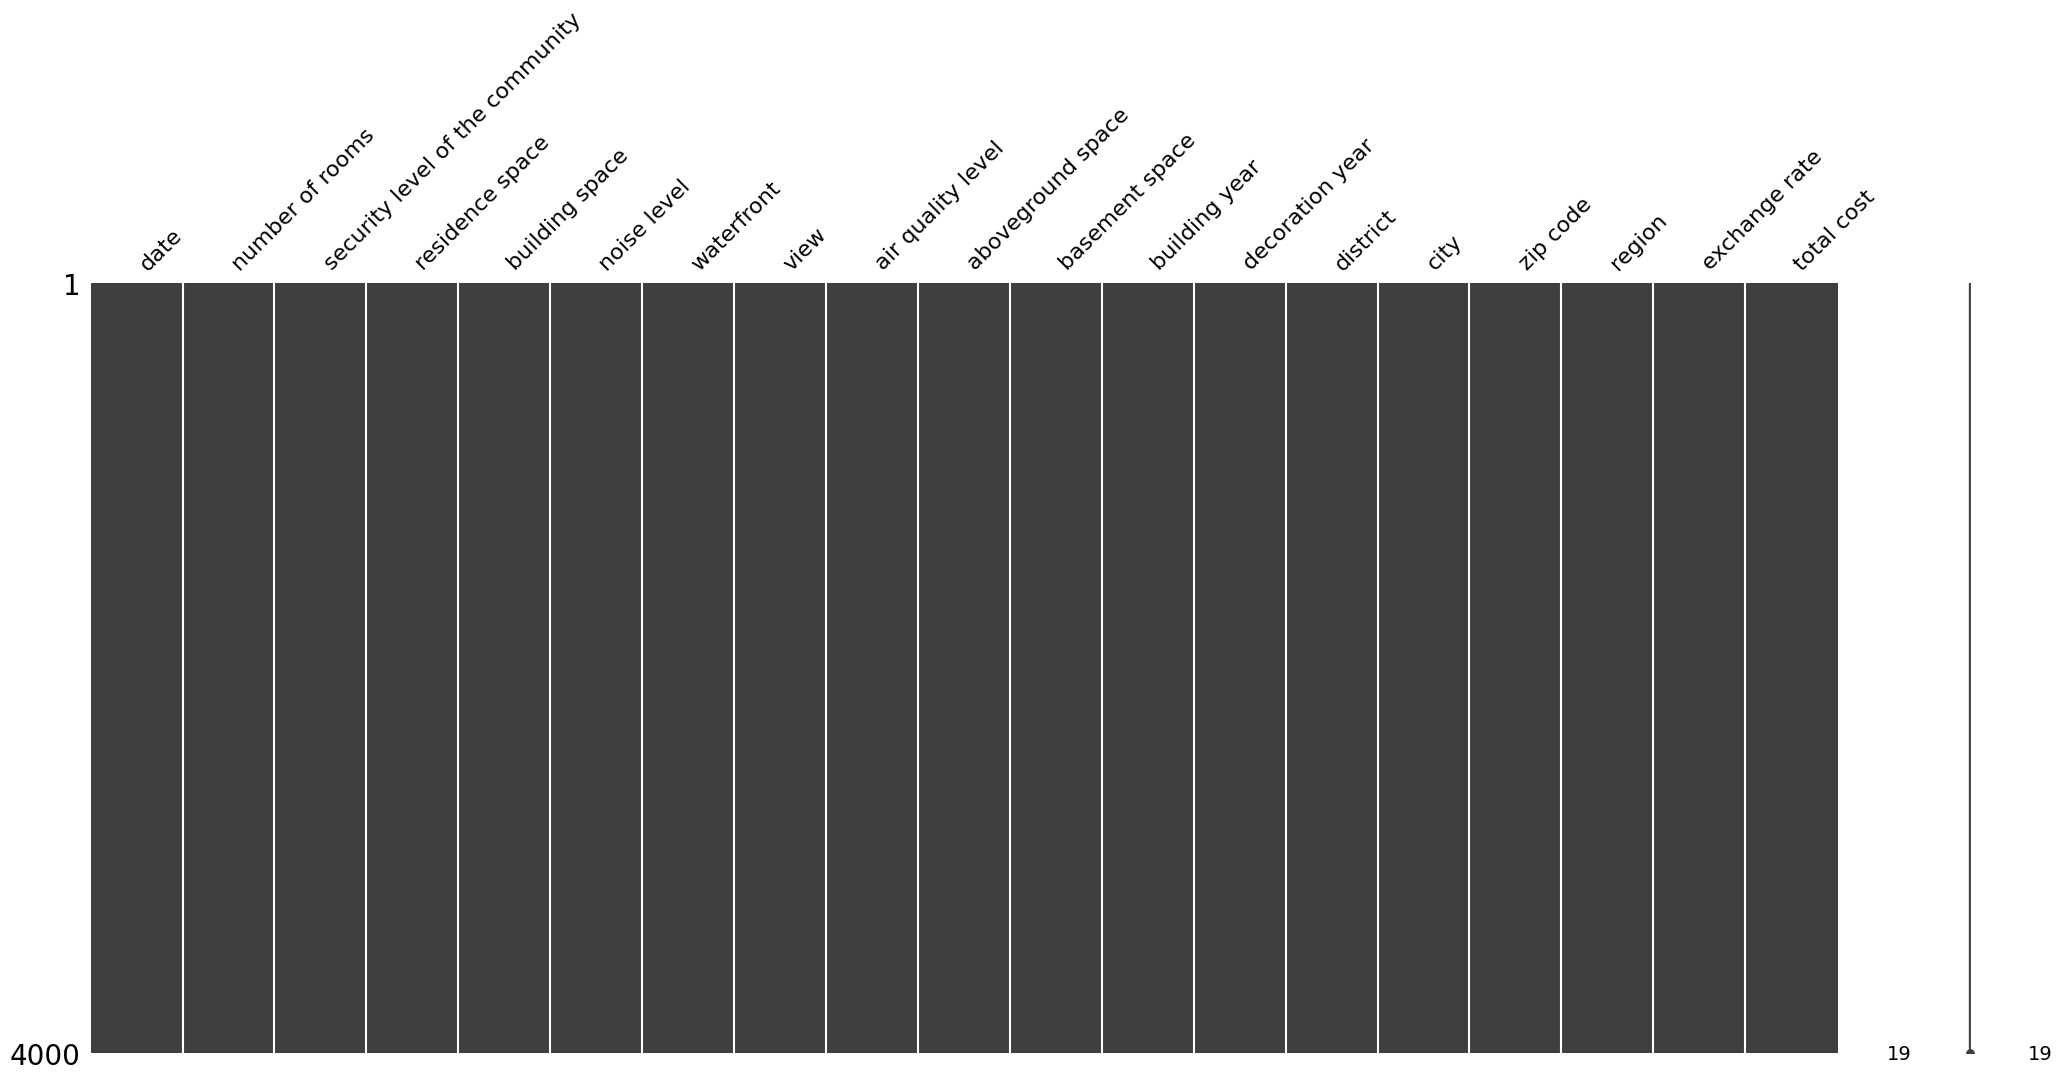

In [3]:
# Check missing value
msno.matrix(data)

### **2. Do encoding / transformation for variables**

Firstly, classify the total cost into four categories (our target).

In [4]:
# Classify the total cost into four categories
data["price range"] = -1
for index, row in data.iterrows():
    if row["total cost"] >=0 and row["total cost"] < 300000:
        data.loc[index, "price range"] = 0
    elif row["total cost"] >=300000 and row["total cost"] < 500000:
        data.loc[index, "price range"] = 1
    elif row["total cost"] >=500000 and row["total cost"] < 700000:
        data.loc[index, "price range"] = 2
    elif row["total cost"] >=700000:
        data.loc[index, "price range"] = 3

In [5]:
# sample numbers of each category
data["price range"].value_counts()

1    1490
2     944
0     830
3     736
Name: price range, dtype: int64

Calculate building time according to "building year". Because these data samples were collected in 2014, so we use 2014 to minus the "building year" to get the "building time".

In [6]:
# calculate building time according to "building year"
data["building time"] = 2014 - data["building year"]

Performe one-hot encoding for feature "city".

In [7]:
# one-hot for "city"
one_hot_city = LabelBinarizer()
result = one_hot_city.fit_transform(data["city"])
data[list(one_hot_city.classes_)[:-1]] = result[:,:-1]

In [8]:
data.head()

,date,number of rooms,security level of the community,residence space,building space,noise level,waterfront,view,air quality level,aboveground space,basement space,building year,decoration year,district,city,zip code,region,exchange rate,total cost,price range,building time,Algona,Auburn,Bellevue,Black Diamond,Bothell,Burien,Carnation,Clyde Hill,Covington,Des Moines,Duvall,Enumclaw,Fall City,Federal Way,Inglewood-Finn Hill,Issaquah,Kenmore,Kent,Kirkland,Lake Forest Park,Maple Valley,Medina,Mercer Island,Milton,Newcastle,Normandy Park,North Bend,Pacific,Preston,Ravensdale,Redmond,Renton,Sammamish,SeaTac,Seattle,Shoreline,Skykomish,Snoqualmie,Snoqualmie Pass,Tukwila,Vashon
0,2014/5/2 00:00,5,2.50,2820,67518,2.0,0,0,3,2820,0,1979,2014,23525 SE 32nd Way,Issaquah,WA 98029,USA,6.784830,675000.0001,2,35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2014/5/2 00:00,2,1.00,1210,9400,1.0,0,0,2,1210,0,1949,0,7542 21st Ave SW,Seattle,WA 98106,USA,6.243129,235000.0000,0,65,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2014/5/2 00:00,4,2.50,2200,9397,2.0,0,0,3,2200,0,1987,2000,5214 S 292nd St,Auburn,WA 98001,USA,6.010127,237227.8571,0,27,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2014/5/2 00:00,3,1.50,1200,9720,1.0,0,0,4,1200,0,1965,0,14034 SE 201st St,Kent,WA 98042,USA,7.560375,242499.9999,0,49,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2014/5/2 00:00,3,1.75,1370,5858,1.0,0,0,3,1370,0,1987,2000,1605 S 245th Pl,Des Moines,WA 98198,USA,6.543941,257950.0000,0,27,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Then we drop useless columns. We drop feature "decoration year", because the "decoration year" for so many samples are "0".

In [9]:
# Drop useless columns
data = data.drop(labels="date", axis=1)
data = data.drop(labels="building year", axis=1)
data = data.drop(labels="decoration year", axis=1)  # drop, because of many 0s
data = data.drop(labels="district", axis=1)
data = data.drop(labels="city", axis=1)
data = data.drop(labels="zip code", axis=1)
data = data.drop(labels="region", axis=1)
data = data.drop(labels="exchange rate", axis=1)
data = data.drop(labels="total cost", axis=1)

In [10]:
# Put the label column at the end
data["label"] = data["price range"]
data = data.drop(labels="price range", axis=1)
data.head()

,number of rooms,security level of the community,residence space,building space,noise level,waterfront,view,air quality level,aboveground space,basement space,building time,Algona,Auburn,Bellevue,Black Diamond,Bothell,Burien,Carnation,Clyde Hill,Covington,Des Moines,Duvall,Enumclaw,Fall City,Federal Way,Inglewood-Finn Hill,Issaquah,Kenmore,Kent,Kirkland,Lake Forest Park,Maple Valley,Medina,Mercer Island,Milton,Newcastle,Normandy Park,North Bend,Pacific,Preston,Ravensdale,Redmond,Renton,Sammamish,SeaTac,Seattle,Shoreline,Skykomish,Snoqualmie,Snoqualmie Pass,Tukwila,Vashon,label
0,5,2.50,2820,67518,2.0,0,0,3,2820,0,35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
1,2,1.00,1210,9400,1.0,0,0,2,1210,0,65,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,4,2.50,2200,9397,2.0,0,0,3,2200,0,27,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,1.50,1200,9720,1.0,0,0,4,1200,0,49,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3,1.75,1370,5858,1.0,0,0,3,1370,0,27,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### **3. Do statistical analysis for variables**

Check correlation between features.

<AxesSubplot: >

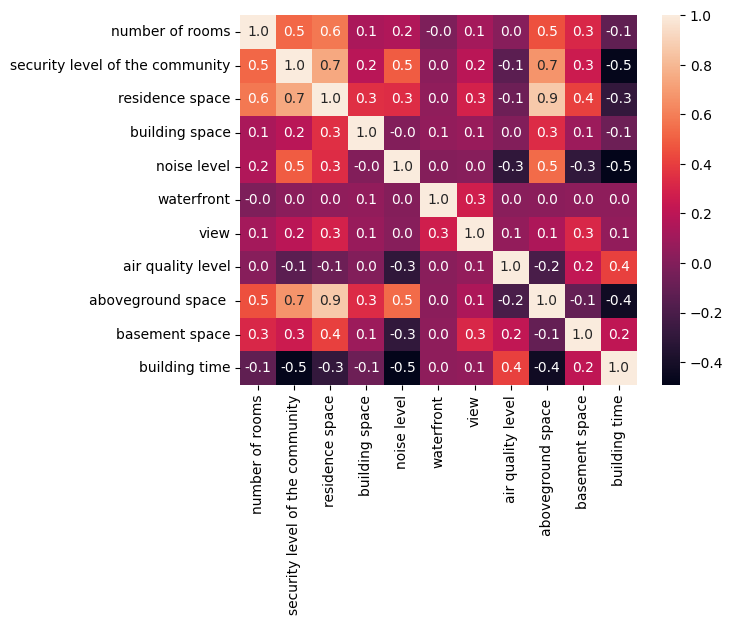

In [12]:
stat_ana_dataset = data.copy()
stat_ana_dataset = stat_ana_dataset[["number of rooms", "security level of the community", "residence space", "building space", "noise level", "waterfront", "view", "air quality level", "aboveground space ", "basement space", "building time"]]
# Check the correlation between columns
sns.heatmap(data=stat_ana_dataset.corr(), annot=True, fmt=".1f")

Visualize the class-specific distribution of each feature.

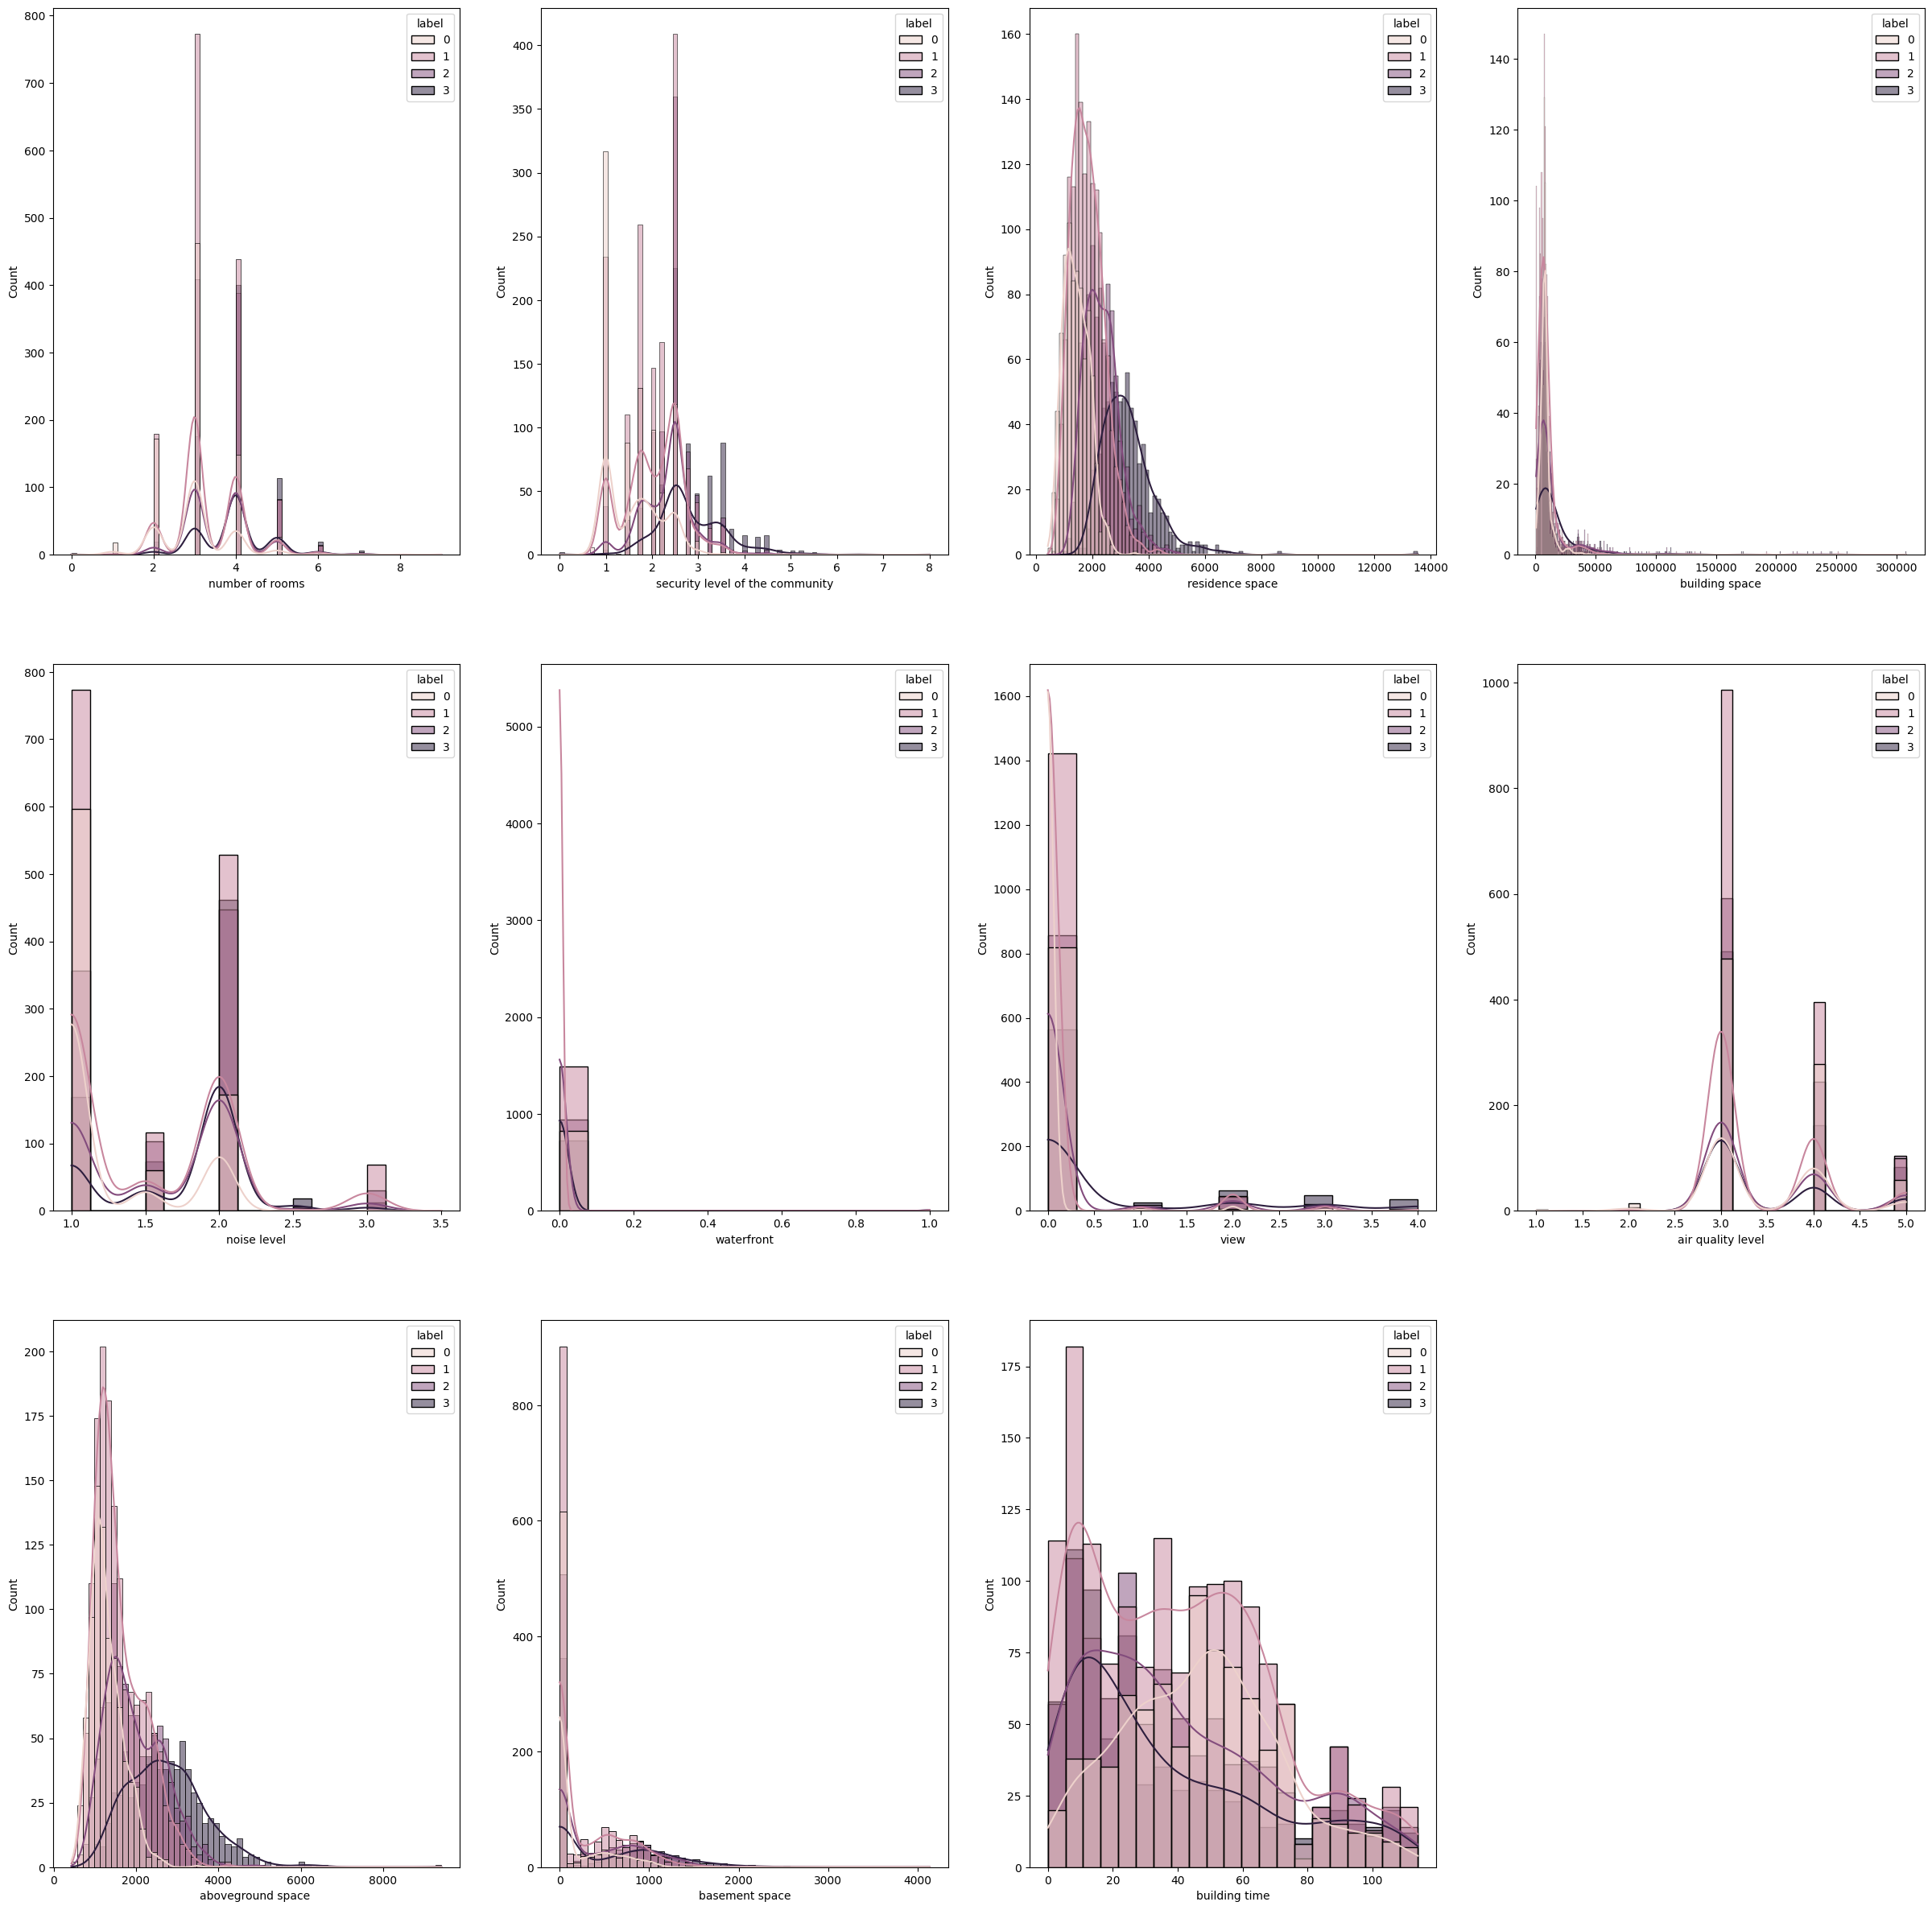

In [14]:
# Draw distribution for each variable
figure = plt.figure(num=1, figsize=(30, 30))
for i in range(len(stat_ana_dataset.columns)):
    sns.histplot(data=data, x=stat_ana_dataset.columns[i], hue="label", kde=True, ax=figure.add_subplot(3,4,i+1))
plt.show()

Draw box-plot for each variable

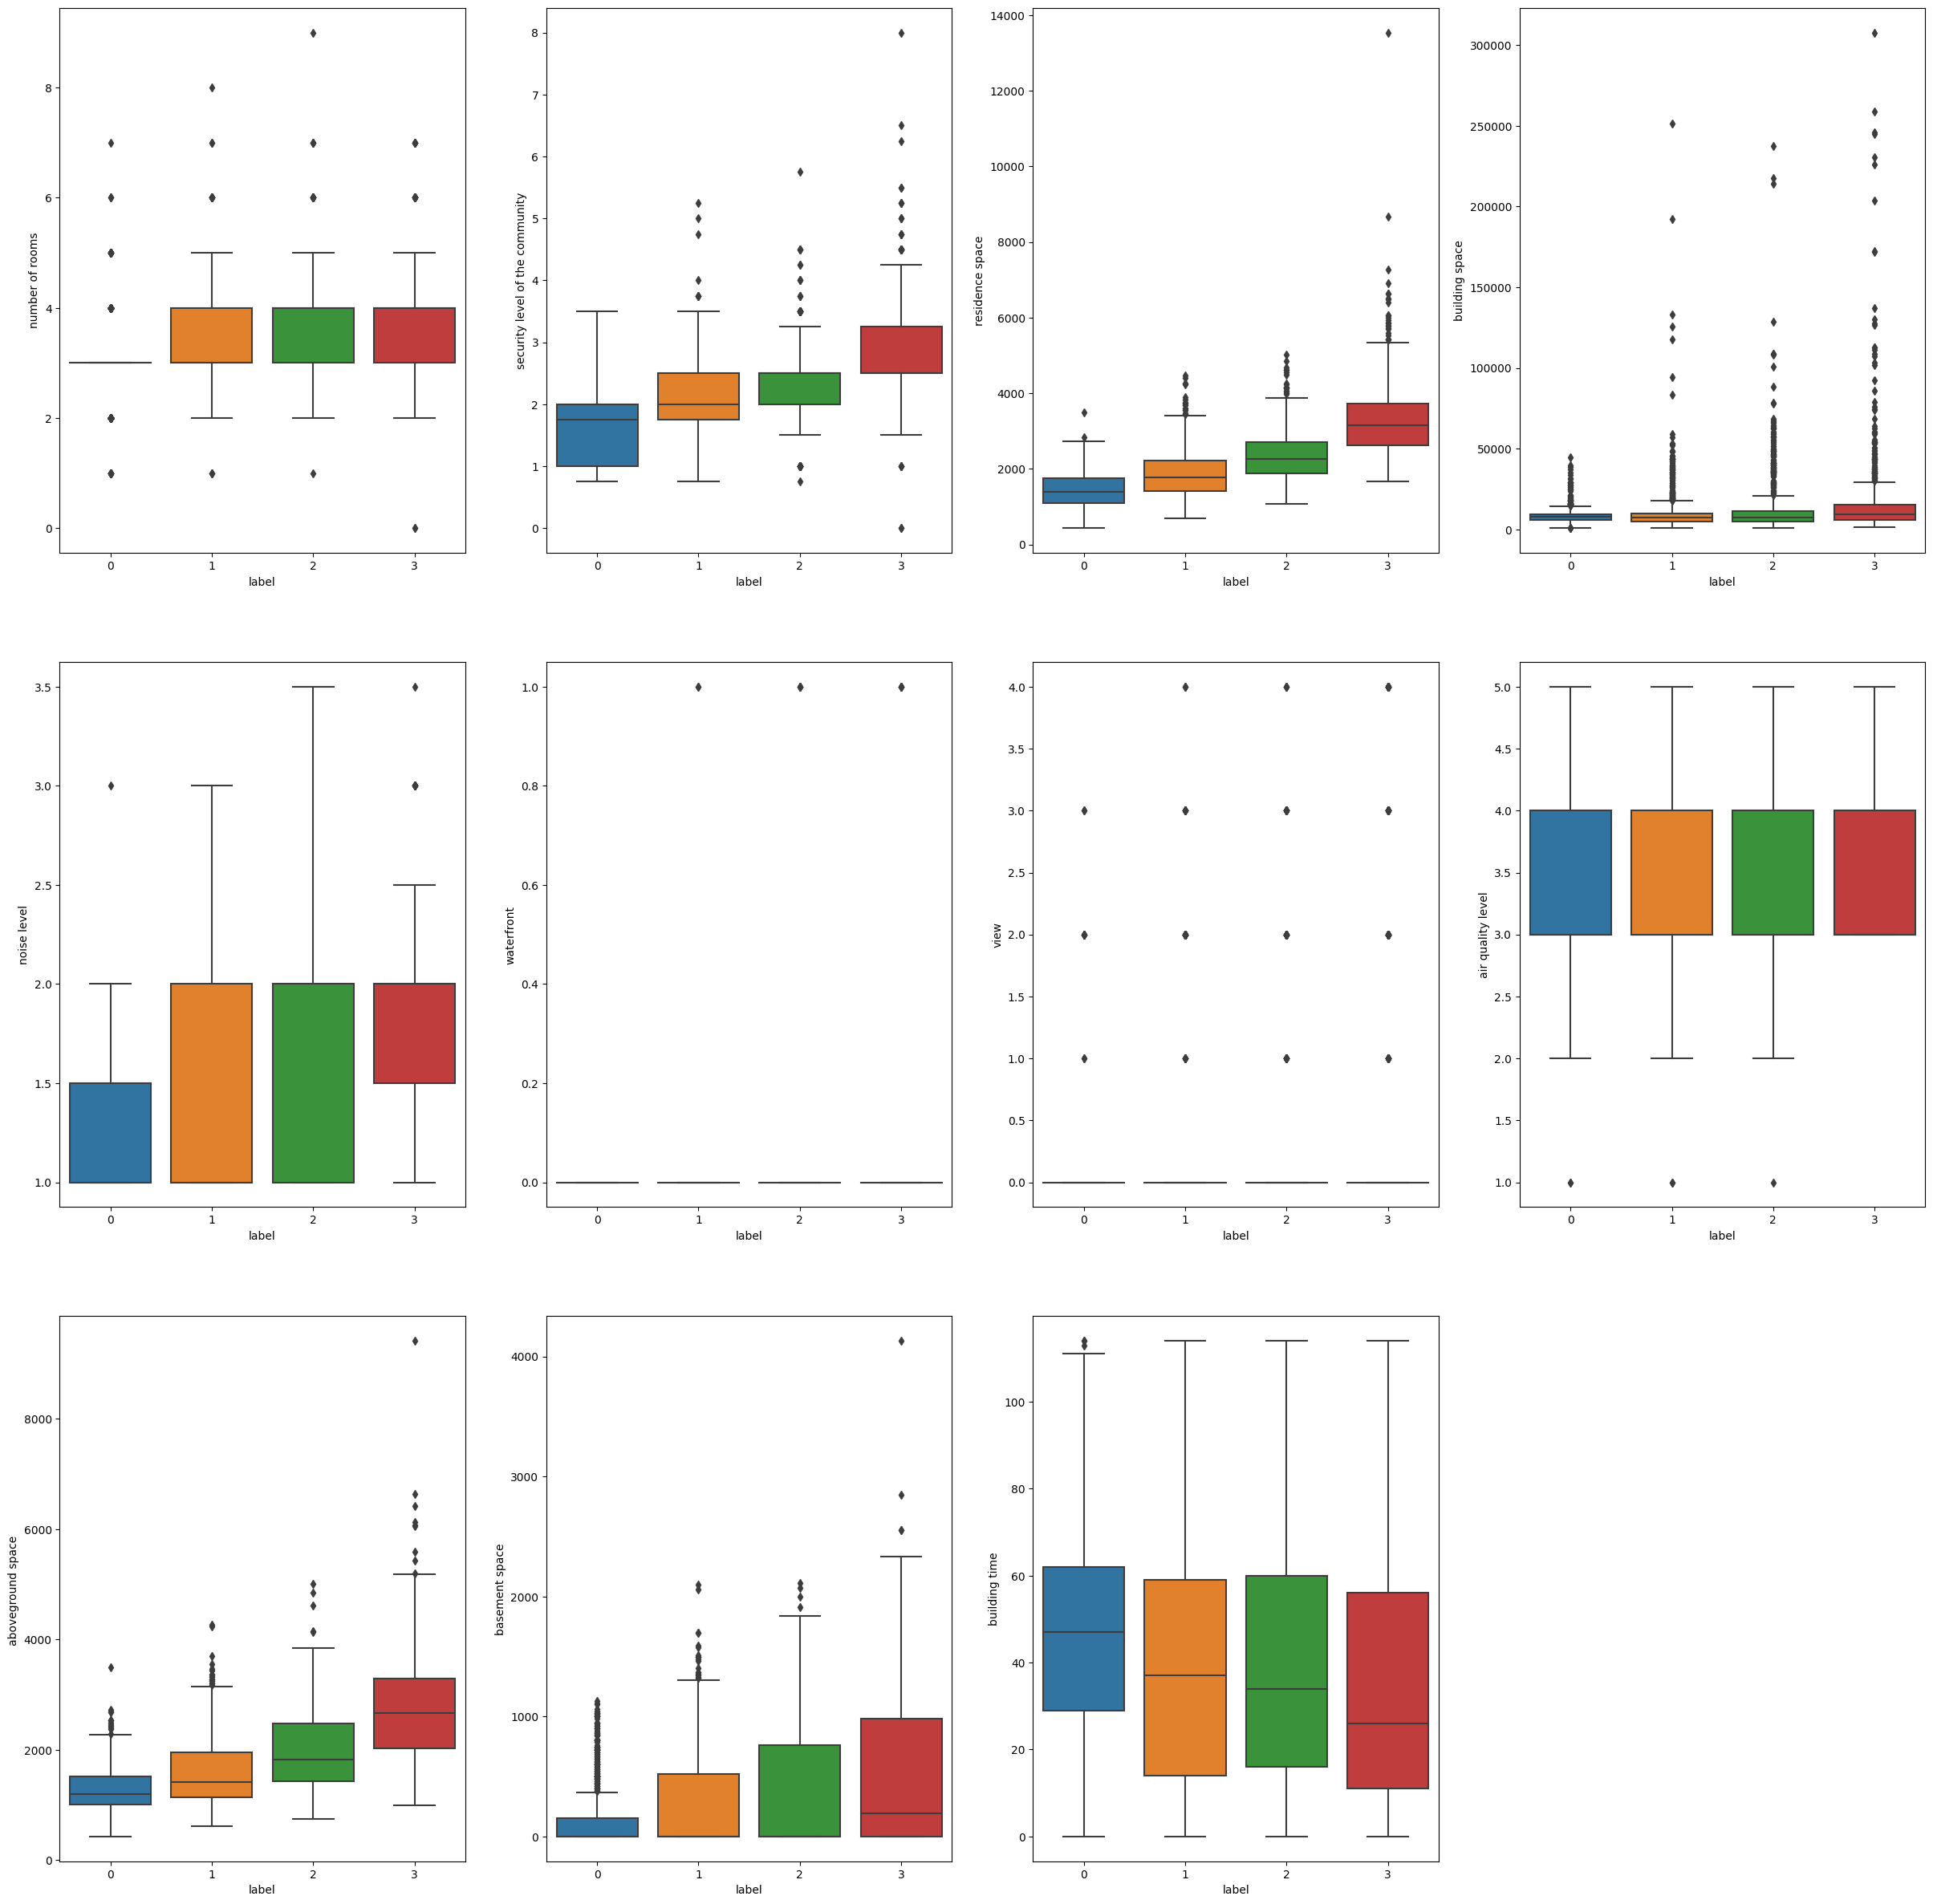

In [15]:
# Draw box-plot for each variable
figure = plt.figure(num=1, figsize=(30, 30))
for i in range(len(stat_ana_dataset.columns)):
    sns.boxplot(data=data, y=stat_ana_dataset.columns[i], x="label", ax=figure.add_subplot(3,4,i+1))
plt.show()

**According to above analysis, we can find:**
- 1. "residence space" & "above ground space" are highly correlated.
- 1. "residence space", "above ground space", "building space" are severe right skewed.
- 2. "waterfront" is a very sparse column (3987 samples-"0",13 samples-"1").

In [17]:
data["waterfront"].value_counts()

0    3987
1      13
Name: waterfront, dtype: int64

**So we do:**

In [18]:
# Drop "waterfront"
data = data.drop(labels="waterfront", axis=1)

In [20]:
# Drop "aboveground space"
data = data.drop(labels="aboveground space ", axis=1)

In [27]:
# Do log to fix right skewd data
data["residence space"] = data["residence space"].apply(math.log)
data["building space"] = data["building space"].apply(math.log)
data["basement space"] = (data["basement space"]+0.001).apply(math.log)
data.head()

,number of rooms,security level of the community,residence space,building space,noise level,view,air quality level,basement space,building time,Algona,Auburn,Bellevue,Black Diamond,Bothell,Burien,Carnation,Clyde Hill,Covington,Des Moines,Duvall,Enumclaw,Fall City,Federal Way,Inglewood-Finn Hill,Issaquah,Kenmore,Kent,Kirkland,Lake Forest Park,Maple Valley,Medina,Mercer Island,Milton,Newcastle,Normandy Park,North Bend,Pacific,Preston,Ravensdale,Redmond,Renton,Sammamish,SeaTac,Seattle,Shoreline,Skykomish,Snoqualmie,Snoqualmie Pass,Tukwila,Vashon,label
0,5,2.50,7.944492,11.120150,2.0,0,3,-6.907755,35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
1,2,1.00,7.098376,9.148465,1.0,0,2,-6.907755,65,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,4,2.50,7.696213,9.148146,2.0,0,3,-6.907755,27,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,1.50,7.090077,9.181941,1.0,0,4,-6.907755,49,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3,1.75,7.222566,8.675564,1.0,0,3,-6.907755,27,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### **4. Modeling**

In this part, we build model based on classical machine learning algorithms -- Decision Tree, KNN, SVM. Details and results are shown below.
<br><br>And we also build a model with ANN, which is in a seperate python file.
<br><br>**Accuracy of model based on decision tree: 65.2%**
<br>**Accuracy of model based on KNN: 66.9%**
<br>**Accuracy of model based on SVM: 69.9%**
<br>**Accuracy of model based on ANN: in another file, achieves the best accuracy (more than 80%)**

In [47]:
from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
X = data.iloc[:,:-1].to_numpy()
X = standardizer.fit_transform(X)
y = data["label"].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.25)

**4.1 Decision Tree**

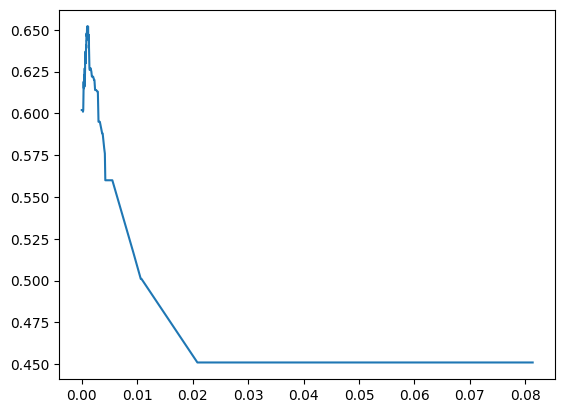

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Find best ccp_alpha
decisiontree = DecisionTreeClassifier(random_state=0)
pruning_path = decisiontree.cost_complexity_pruning_path(X, y)
ccp_alphas = pruning_path['ccp_alphas']
acc = []
for alpha in ccp_alphas:
    decisiontree = DecisionTreeClassifier(random_state=0, ccp_alpha=alpha)
    model = decisiontree.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc.append(accuracy_score(y_pred, y_test))
plt.plot(ccp_alphas, acc)
plt.show()
best_ccp_alphas = ccp_alphas[acc.index(max(acc))]

In [50]:
decisiontree = DecisionTreeClassifier(random_state=0, ccp_alpha=best_ccp_alphas)
model = decisiontree.fit(X_train, y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Accuracy: ", accuracy_score(y_test, y_pred))
pd.DataFrame(cm, columns=["Predicted-Class0", "Predicted-Class1", "Predicted-Class2", "Predicted-Class3"], index=["Actual-Class0", "Actual-Class1", "Actual-Class2", "Actual-Class3"])

Accuracy:  0.652


,Predicted-Class0,Predicted-Class1,Predicted-Class2,Predicted-Class3
Actual-Class0,155,64,1,2
Actual-Class1,63,233,58,14
Actual-Class2,1,68,144,38
Actual-Class3,0,9,30,120


In [51]:
# Show the tree
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(model, feature_names=data.columns[:-1], out_file=None)
graph = graphviz.Source(dot_data)
graph.render("TreeModel")

'TreeModel.pdf'

**4.2 KNN**

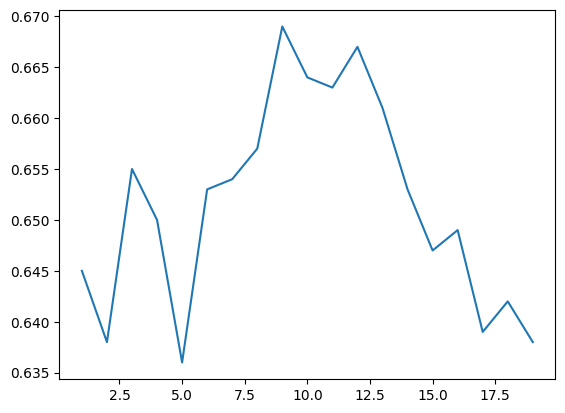

In [59]:
from sklearn.neighbors import KNeighborsClassifier

# Select best k
acc = []
for k in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    model = knn.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc.append(accuracy_score(y_test, y_pred))
plt.plot(list(range(1,20)), acc)
plt.show()

In [60]:
knn = KNeighborsClassifier(n_neighbors=9, n_jobs=-1)
model = knn.fit(X_train, y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Accuracy: ", accuracy_score(y_test, y_pred))
pd.DataFrame(cm, columns=["Predicted-Class0", "Predicted-Class1", "Predicted-Class2", "Predicted-Class3"], index=["Actual-Class0", "Actual-Class1", "Actual-Class2", "Actual-Class3"])

Accuracy:  0.669


,Predicted-Class0,Predicted-Class1,Predicted-Class2,Predicted-Class3
Actual-Class0,150,69,3,0
Actual-Class1,35,294,35,4
Actual-Class2,5,93,111,42
Actual-Class3,0,17,28,114


**4.3 SVM**

In [64]:
from sklearn.svm import SVC

svc = SVC(kernel="rbf", random_state=0)
model = svc.fit(X_train, y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Accuracy: ", accuracy_score(y_test, y_pred))
pd.DataFrame(cm, columns=["Predicted-Class0", "Predicted-Class1", "Predicted-Class2", "Predicted-Class3"], index=["Actual-Class0", "Actual-Class1", "Actual-Class2", "Actual-Class3"])

Accuracy:  0.699


,Predicted-Class0,Predicted-Class1,Predicted-Class2,Predicted-Class3
Actual-Class0,155,66,1,0
Actual-Class1,24,304,36,4
Actual-Class2,3,93,110,45
Actual-Class3,0,4,25,130


### **5. Preprocessing for testing data**

Since we need to do prediction on "Test_Data.csv" file, so we perform the same preprocessing on "Test_Data.csv" as we do on "Train_Data.csv".

In [65]:
data.head()

,number of rooms,security level of the community,residence space,building space,noise level,view,air quality level,basement space,building time,Algona,Auburn,Bellevue,Black Diamond,Bothell,Burien,Carnation,Clyde Hill,Covington,Des Moines,Duvall,Enumclaw,Fall City,Federal Way,Inglewood-Finn Hill,Issaquah,Kenmore,Kent,Kirkland,Lake Forest Park,Maple Valley,Medina,Mercer Island,Milton,Newcastle,Normandy Park,North Bend,Pacific,Preston,Ravensdale,Redmond,Renton,Sammamish,SeaTac,Seattle,Shoreline,Skykomish,Snoqualmie,Snoqualmie Pass,Tukwila,Vashon,label
0,5,2.50,7.944492,11.120150,2.0,0,3,-6.907755,35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
1,2,1.00,7.098376,9.148465,1.0,0,2,-6.907755,65,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,4,2.50,7.696213,9.148146,2.0,0,3,-6.907755,27,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,1.50,7.090077,9.181941,1.0,0,4,-6.907755,49,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3,1.75,7.222566,8.675564,1.0,0,3,-6.907755,27,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [69]:
# Read in testing data
test_data = pd.read_csv("Test_Data.csv")
test_data["building time"] = 2014 - test_data["building year"]

In [72]:
result = one_hot_city.transform(test_data["city"])
test_data[list(one_hot_city.classes_)[:-1]] = result[:,:-1]

In [74]:
test_data = test_data.drop(labels="date", axis=1)
test_data = test_data.drop(labels="building year", axis=1)
test_data = test_data.drop(labels="decoration year", axis=1)
test_data = test_data.drop(labels="district", axis=1)
test_data = test_data.drop(labels="city", axis=1)
test_data = test_data.drop(labels="zip code", axis=1)
test_data = test_data.drop(labels="region", axis=1)
test_data = test_data.drop(labels="exchange rate", axis=1)
test_data = test_data.drop(labels="total cost", axis=1)

In [78]:
test_data = test_data.drop(labels="waterfront", axis=1)
test_data = test_data.drop(labels="aboveground space ", axis=1)

In [80]:
test_data["residence space"] = test_data["residence space"].apply(math.log)
test_data["building space"] = test_data["building space"].apply(math.log)
test_data["basement space"] = (test_data["basement space"]+0.001).apply(math.log)
test_data.head()

,number of rooms,security level of the community,residence space,building space,noise level,view,air quality level,basement space,building time,Algona,Auburn,Bellevue,Black Diamond,Bothell,Burien,Carnation,Clyde Hill,Covington,Des Moines,Duvall,Enumclaw,Fall City,Federal Way,Inglewood-Finn Hill,Issaquah,Kenmore,Kent,Kirkland,Lake Forest Park,Maple Valley,Medina,Mercer Island,Milton,Newcastle,Normandy Park,North Bend,Pacific,Preston,Ravensdale,Redmond,Renton,Sammamish,SeaTac,Seattle,Shoreline,Skykomish,Snoqualmie,Snoqualmie Pass,Tukwila,Vashon
0,4,2.5,7.979339,8.294050,1.5,0,5,6.917707,105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,2,1.0,6.684612,8.486734,1.0,0,4,-6.907755,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,1.0,6.779922,8.760923,1.0,0,3,-6.907755,76,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,5,2.5,8.202482,9.110520,2.0,4,5,5.634793,93,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,2,1.0,6.802395,8.517193,1.0,0,3,-6.907755,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [81]:
# test_data.to_csv("TestDataAfterPreprocessing.csv")

In [87]:
# Predict with SVM model on testing datatset
# test_X = standardizer.transform(test_data.to_numpy())
# test_result = model.predict(test_X).reshape((-1,1))

In [90]:
# pd.DataFrame(test_result).to_csv("TestPredictionOnSVM.csv")